# Mixed model of the CDM and guess

The fitting procedure consists of the following steps:
- importing data
- estimating the parameters of choice angle
- calculating the statistics of response time
- estimating the CDM parameters
- plotting fits

##  Importing data

The data should be a couple in the format of a list or a NumPy array in which `CA` represents the choice angle and `RT` represents the response time data.\
Here, we use an example for the data containing 200 trials which are simulated from the CDM with the following parameter values:

| Parameter | Value |
| ----------- | ----------- |
| drift length | 2 |
| drift angle | 0.2 |
| threshold | 2 |
| non-decision time | 0.6 |

Also, we combine these data with 100 trials coming from gues whose chjoice angle are uniform and we suppose that their response time are normally distributed with mean of 1.5 and a variance of 1 truncated below by zero.

The choice angle is in radian and response time is in second.

In [1]:
CA = [  1.298, -0.374,  0.783,  0.491, -0.141, -0.089,  0.724,  0.356,
        0.437, -0.304,  0.3  ,  0.   , -0.328,  0.98 , -0.457,  0.247,
        0.56 ,  0.736,  0.092,  0.887,  1.022,  0.597, -0.537, -0.247,
        0.454,  1.01 , -0.141, -0.217,  0.572,  0.12 , -0.507,  0.482,
        1.007,  0.937,  0.046, -0.322, -0.034,  0.86 ,  0.128,  0.065,
        1.467,  1.119, -0.009, -0.295, -0.34 , -0.617,  0.864, -0.429,
        0.708, -0.296, -0.357, -0.366,  0.168,  1.419,  0.864, -0.142,
        1.373, -0.268,  0.831,  0.609,  0.671, -0.799,  0.014,  0.448,
        1.021,  0.67 ,  0.089,  1.217,  0.679,  0.654,  0.935,  1.347,
       -0.265, -0.524,  0.056,  0.018,  0.413,  0.502,  0.183,  0.851,
        0.156,  0.84 ,  0.556,  0.633,  1.443,  1.814, -0.067,  0.295,
       -0.509, -0.234, -0.299, -0.538,  0.07 ,  0.045,  0.839,  0.075,
        0.818,  0.63 ,  1.041, -0.156,  0.51 , -0.479, -0.184, -0.57 ,
        0.302,  0.725, -0.668,  0.584,  0.097, -0.086,  0.168, -0.189,
       -0.06 ,  0.594, -0.23 ,  0.109,  0.313,  0.734,  0.736,  0.478,
        0.933,  0.112,  0.256,  0.05 ,  0.272,  0.336, -0.539, -0.337,
        0.286,  0.301,  0.749, -0.292,  0.581, -0.134, -0.056,  1.034,
        0.279, -0.735,  0.337,  1.091,  0.695, -0.126,  0.282,  0.377,
       -0.341,  0.681,  0.592, -0.245, -0.137,  0.213, -0.162,  0.15 ,
        0.599, -0.548, -0.836,  0.127,  0.245,  0.076,  0.204,  0.396,
        0.604,  0.155,  0.277, -0.893,  0.222, -0.438,  0.147,  0.387,
        0.021,  0.605, -0.085, -1.154, -0.247,  0.914,  0.754,  0.606,
       -0.228,  0.044, -0.178,  0.754, -0.135, -0.43 ,  1.305,  0.17 ,
        0.427,  0.158,  1.225,  0.373,  0.113,  1.009,  0.454,  0.874,
        0.572,  0.68 ,  0.846,  0.642,  0.661,  0.064,  0.839,  0.345 ]

RT = [ 1.779, 1.07 , 1.01 , 1.42 , 0.806, 1.491, 1.751, 1.473, 1.362,
       1.264, 1.071, 1.029, 1.331, 1.633, 1.452, 1.403, 1.648, 1.385,
       1.775, 2.531, 1.572, 3.21 , 1.313, 1.357, 2.074, 1.43 , 1.81 ,
       1.504, 1.237, 1.199, 1.081, 1.736, 2.163, 1.564, 1.372, 1.047,
       0.983, 1.295, 1.19 , 1.319, 1.008, 1.292, 1.814, 0.861, 0.987,
       1.125, 1.298, 1.515, 1.118, 1.074, 1.172, 1.82 , 1.208, 1.164,
       1.251, 1.313, 1.696, 1.409, 1.039, 1.558, 1.111, 1.667, 2.321,
       1.451, 1.986, 1.781, 0.931, 1.014, 1.217, 1.35 , 1.326, 0.936,
       1.308, 1.193, 1.433, 1.48 , 1.391, 1.307, 1.27 , 1.324, 1.535,
       1.074, 1.221, 1.241, 1.016, 1.131, 1.651, 1.896, 1.498, 1.4  ,
       1.392, 1.122, 1.21 , 0.949, 1.747, 1.357, 1.619, 1.019, 1.513,
       1.319, 0.869, 1.151, 2.842, 3.566, 0.932, 0.989, 1.293, 1.482,
       1.178, 1.718, 2.21 , 1.025, 1.741, 1.471, 1.546, 2.001, 1.706,
       1.399, 1.283, 1.846, 1.576, 0.952, 1.363, 1.118, 1.163, 1.348,
       1.026, 1.175, 1.034, 1.75 , 1.567, 1.397, 1.145, 2.005, 1.099,
       1.1  , 2.153, 1.381, 1.38 , 1.3  , 0.967, 1.633, 1.774, 1.867,
       1.954, 0.854, 1.228, 2.17 , 1.441, 3.017, 1.195, 1.582, 1.071,
       1.138, 1.392, 1.526, 1.715, 1.595, 1.29 , 1.829, 1.186, 1.055,
       1.39 , 3.263, 2.024, 1.567, 1.485, 1.329, 1.952, 2.184, 1.615,
       1.268, 1.306, 1.   , 1.237, 1.559, 1.655, 1.582, 1.118, 1.661,
       0.936, 1.527, 1.452, 1.095, 1.713, 1.247, 1.712, 1.808, 1.387,
       1.304, 1.066, 1.657, 1.321, 1.571, 1.656, 1.11 , 2.064, 1.062,
       1.702, 2.064 ]

In [2]:
CA = CA + [-1.669,  2.111,  0.953, -2.225, -3.116,  0.204, -0.547,  2.38 ,
           -2.349,  1.375, -0.877,  2.853, -0.955, -1.798,  1.938,  0.714,
            2.441, -1.862,  0.918, -0.155,  1.165,  0.33 , -1.01 , -1.309,
           -1.716, -0.27 ,  2.615,  1.17 ,  2.114,  2.399, -1.156, -1.311,
            2.366, -0.195, -2.762,  1.625, -2.975,  0.279,  1.421, -0.1  ,
            0.486,  1.657,  0.567, -2.599, -3.072, -2.626, -1.866, -0.823,
            0.536,  1.528, -2.725,  1.159,  2.617, -1.588, -1.23 , -2.029,
            1.198, -0.168, -1.142,  0.561, -2.741,  0.542,  1.849,  0.466,
            0.856, -2.627,  0.384,  3.097, -1.596,  2.906,  1.733, -0.028,
           -1.924, -1.822, -1.183, -1.274,  2.362, -1.19 ,  2.842,  1.486,
            2.162,  3.114,  0.715, -0.78 ,  0.134,  0.506,  0.326,  2.004,
            2.545, -2.373,  1.147, -2.099, -1.148, -1.191, -0.925,  3.099,
           -2.815,  2.115,  1.153, -0.463]

RT = RT + [ 2.627, -0.504,  2.105,  2.519,  1.338,  2.448,  3.976,  3.083,
            1.593,  2.235,  0.745,  1.142,  1.743,  0.37 ,  2.015,  1.69 ,
            0.343,  2.437,  1.389, -0.865,  1.298,  1.514,  1.969,  1.24 ,
            0.536,  1.673,  1.142,  0.75 , -0.49 ,  2.952,  2.6  , -0.212,
            0.467,  1.463,  2.566,  3.388,  1.8  ,  0.704,  0.986,  1.792,
            2.104,  0.133,  1.483,  1.552,  0.031,  3.898,  4.096,  0.241,
            2.019,  2.043,  2.678,  2.929,  0.584,  1.319,  1.14 ,  1.45 ,
            3.069,  2.974,  1.657,  2.29 ,  2.074,  1.559,  1.569,  2.044,
            1.199,  1.378, -0.232,  0.746,  1.571,  2.474,  2.112,  1.698,
            3.122,  3.271,  1.088,  2.946,  2.639,  2.845,  0.635,  0.303,
            2.112,  1.303,  2.606,  3.131,  1.885,  1.254,  0.421,  1.297,
            1.09 ,  0.826,  1.16 ,  2.496,  2.08 ,  1.601,  2.112,  1.885,
            2.288,  2.378,  1.482,  2.234]

We convert the data to numpy array form.

In [3]:
import numpy as np

CA = np.array(CA)
RT = np.array(RT)

## Estimating the parameters of choice angle

We fit the mixed model on choice angle data. The likelihood function is:

\begin{equation*}
Pr(\theta) = \frac{p}{2\pi}+(1-p)\frac{e^{\kappa \cos(\theta-\mu)}}{2\pi I_0(\kappa)}
\end{equation*}

where $\theta$ is the choice angle, $p$ is the guess proportion, and $\mu$ and $\kappa$ are respectively the mean and concentration (acts as inverse of dispersion) parameters.\
We use the Nelder-Mead optimization algorithm for finding the maximum of the likelihood function (actually minimum of the negative log-likelihood function).

In [4]:
from scipy.special import iv

def mixed(params, data):
    p = params[0]
    mu = params[1]
    kappa = params[2]
    ans = p/2/np.pi + (1-p)*np.exp(kappa*np.cos(data-mu))/iv(0,kappa)/2/np.pi
    return -np.sum(np.log(ans))

In [5]:
from scipy.optimize import minimize
from numpy.random import uniform

x0 = [uniform(0,1), uniform(-np.pi,np.pi), uniform(0,50)] # random starting point for the Nelder-Mead 
opt = minimize(mixed, x0, args=(CA), method='Nelder-Mead', bounds=((0,1),(-np.pi,np.pi),(0,50)))
p , mu , k = opt.x
opt

 final_simplex: (array([[0.29689645, 0.2834507 , 3.43278069],
       [0.29689397, 0.28345592, 3.43270756],
       [0.29689306, 0.28346033, 3.43281109],
       [0.29690552, 0.28345332, 3.43279359]]), array([423.90370836, 423.90370839, 423.90370839, 423.90370839]))
           fun: 423.9037083594836
       message: 'Optimization terminated successfully.'
          nfev: 243
           nit: 137
        status: 0
       success: True
             x: array([0.29689645, 0.2834507 , 3.43278069])

It is recommended to execute the above cell to find the global optimum for different starting simplex of the Nelder-Mead.

This gives the estimated values of $p=0.30$ (the data generating value was $1/3$), $\mu=0.28$, and $\kappa=3.43$.

## Calculating the statistics of response time

First we should separate the response time data to two categories of high accuracy and low accuracy. We do so by finding a range around the angle $\mu$ that contains the half of data points. This range length will be 2 times the median of absolute values of choice angle data minus choice angle mean.

In [6]:
r = 2*np.median(np.abs((CA-mu+np.pi)%(2*np.pi)-np.pi))

In [7]:
sum(CA<mu-r/2) + sum(CA>mu+r/2)

150

Now, we can use the following equations to calculate the mean and variance of the CDM response time:

\begin{equation*}
    \left\{
    \begin{aligned}
        & M_1 = \frac{q^{(2)}E^{(1)}-q^{(1)}E^{(2)}}{q^{(2)}-q^{(1)}} \\
        & M_2 = \frac{(1-q^{(2)})E^{(1)}-(1-q^{(1)})E^{(2)}}{q^{(1)}-q^{(2)}} \\
        & V_1 = \frac{q^{(2)}V^{(1)}-q^{(1)}V^{(2)}}{q^{(2)}-q^{(1)}} - q^{(1)}q^{(2)}(M_1-M_2)^2 \\
        & V_2 = \frac{(1-q^{(2)})V^{(1)}-(1-q^{(1)})V^{(2)}}{q^{(1)}-q^{(2)}} \\
        & \quad - (1-q^{(1)})(1-q^{(2)})(M_1-M_2)^2
    \end{aligned}
    \right.
\end{equation*}

$M_1$ and $V_1$ are respectively the mean and variance of the CDM response time. \
$M_2$ and $V_2$ are respectively the mean and variance of the guess response time. \
$E^{(1)}$ and $V^{(1)}$ are respectively the mean and variance of the response time data in the high accuracy range. \
$E^{(2)}$ and $V^{(2)}$ are respectively the mean and variance of the response time data in the low accuracy range. \
$q^{(1)}$ is the guess proportion in the high accuracy range ($q^{(1)}=pr/\pi$). \
$q^{(2)}$ is the guess proportion in the high accuracy range ($q^{(2)}=p(2\pi-r)/\pi$).

In [8]:
RT1 = RT[np.logical_and(CA>mu-r/2, CA<mu+r/2)]
RT2 = RT[np.logical_or(CA<mu-r/2, CA>mu+r/2)]
E1 = np.mean(RT1)
Var1 = np.var(RT1)
E2 = np.mean(RT2)
Var2 = np.var(RT2)
q1 = p*r/np.pi
q2 = p*(2*np.pi-r)/np.pi

M1 = (q2*E1-q1*E2)/(q2-q1)
M2 = ((1-q2)*E1-(1-q1)*E2)/(q1-q2)
V1 = (q2*Var1-q1*Var2)/(q2-q1)-q1*q2*(M1-M2)**2
V2 = ((1-q2)*Var1-(1-q1)*Var2)/(q1-q2)-(1-q1)*(1-q2)*(M1-M2)**2

In [9]:
M1, V1, M2, V2

(1.4499688111969848,
 0.14320379782242543,
 1.7298122487421776,
 1.184984557945348)

The mean and variance of guess are estimated to be 1.73 (generating mean was 1.5 and the mean of generated guess data was 1.69) and 1.18 (generating variance was 1 and the variance of generated guess data was 1.00)

## Estimating the CDM parameters

The calculations are as follow:
\begin{equation*}
  \left\{
    \begin{aligned}
        & \theta_v = \mu  \\  
        & R = I_1(k)/I_0(k) \\
        & v = \sqrt[4]{\frac{1}{V_1}\Big( \kappa^2R^2 + 2\kappa R-\kappa^2 \Big)} \\
        & a = \kappa_1/v \\
        & t_0 = M_1 - \frac{a}{v}R
    \end{aligned}
  \right.
\end{equation*}

In [10]:
theta_v = mu
R = iv(1,k)/iv(0,k)
v = ((k**2*R**2+2*k*R-k**2)/V1)**(1/4)
a = k/v
t0 = M1-a/v*R

In [11]:
v, theta_v, a, t0

(1.9868661135725374,
 0.28345070349261686,
 1.7277362914285677,
 0.7216842703273986)

The estimated parameter values are:

| Parameter | Generating Value | Estimated Value |
| ----------- | ----------- | ----------- |
| drift length | 2 | 1.98 |
| drift angle | 0.2 | 0.283 |
| threshold | 2 | 1.73 |
| non-decision time | 0.6 | 0.722 |

## Plotting fits 

We can use the mixed model likelihood for calculating the distribution of choice angle. For experimental data, we can not show the fits on the response time data since we did not assume any distribution for guess response time. Also, we can not separate the response time data coming from the CDM, but here we know the CDM data so we can plot the fits of the CDM model on them, using the probability function:

\begin{equation*}
        Pr(t) = \frac{I_0(av)}{a^2}\sum_{i =1}^{\infty}\frac{j_{0,i}}{J_1(j_{0,i})}\exp\big(-\frac{(t-t_0)}{2}(v^2+\frac{j_{0,i}^2}{a^2})\big) 
\end{equation*}

In [12]:
CDM_RT =  [ 1.779, 1.07 , 1.01 , 1.42 , 0.806, 1.491, 1.751, 1.473, 1.362,
           1.264, 1.071, 1.029, 1.331, 1.633, 1.452, 1.403, 1.648, 1.385,
           1.775, 2.531, 1.572, 3.21 , 1.313, 1.357, 2.074, 1.43 , 1.81 ,
           1.504, 1.237, 1.199, 1.081, 1.736, 2.163, 1.564, 1.372, 1.047,
           0.983, 1.295, 1.19 , 1.319, 1.008, 1.292, 1.814, 0.861, 0.987,
           1.125, 1.298, 1.515, 1.118, 1.074, 1.172, 1.82 , 1.208, 1.164,
           1.251, 1.313, 1.696, 1.409, 1.039, 1.558, 1.111, 1.667, 2.321,
           1.451, 1.986, 1.781, 0.931, 1.014, 1.217, 1.35 , 1.326, 0.936,
           1.308, 1.193, 1.433, 1.48 , 1.391, 1.307, 1.27 , 1.324, 1.535,
           1.074, 1.221, 1.241, 1.016, 1.131, 1.651, 1.896, 1.498, 1.4  ,
           1.392, 1.122, 1.21 , 0.949, 1.747, 1.357, 1.619, 1.019, 1.513,
           1.319, 0.869, 1.151, 2.842, 3.566, 0.932, 0.989, 1.293, 1.482,
           1.178, 1.718, 2.21 , 1.025, 1.741, 1.471, 1.546, 2.001, 1.706,
           1.399, 1.283, 1.846, 1.576, 0.952, 1.363, 1.118, 1.163, 1.348,
           1.026, 1.175, 1.034, 1.75 , 1.567, 1.397, 1.145, 2.005, 1.099,
           1.1  , 2.153, 1.381, 1.38 , 1.3  , 0.967, 1.633, 1.774, 1.867,
           1.954, 0.854, 1.228, 2.17 , 1.441, 3.017, 1.195, 1.582, 1.071,
           1.138, 1.392, 1.526, 1.715, 1.595, 1.29 , 1.829, 1.186, 1.055,
           1.39 , 3.263, 2.024, 1.567, 1.485, 1.329, 1.952, 2.184, 1.615,
           1.268, 1.306, 1.   , 1.237, 1.559, 1.655, 1.582, 1.118, 1.661,
           0.936, 1.527, 1.452, 1.095, 1.713, 1.247, 1.712, 1.808, 1.387,
           1.304, 1.066, 1.657, 1.321, 1.571, 1.656, 1.11 , 2.064, 1.062,
           1.702, 2.064 ]

In [13]:
import scipy

j0 = scipy.special.jn_zeros(0, 200)
J1 = scipy.special.jv(1, j0)

def PrRT(v, theta_v, a, t0, t):
    if t<=t0:
        return 0
    else:
        ans = sum(j0/J1*np.exp(-j0**2*(t-t0)/2/a**2))/a**2*np.exp(-v**2*(t-t0)/2)*iv(0,v*a)
        if ans<0: # returning 0 for negative probability
            ans = 0
        if j0[-1]/J1[-1]*np.exp(-j0[-1]**2*(t-t0)/2/a**2) != 0: # returning 0 for non-convereged series
            ans = 0
        return ans

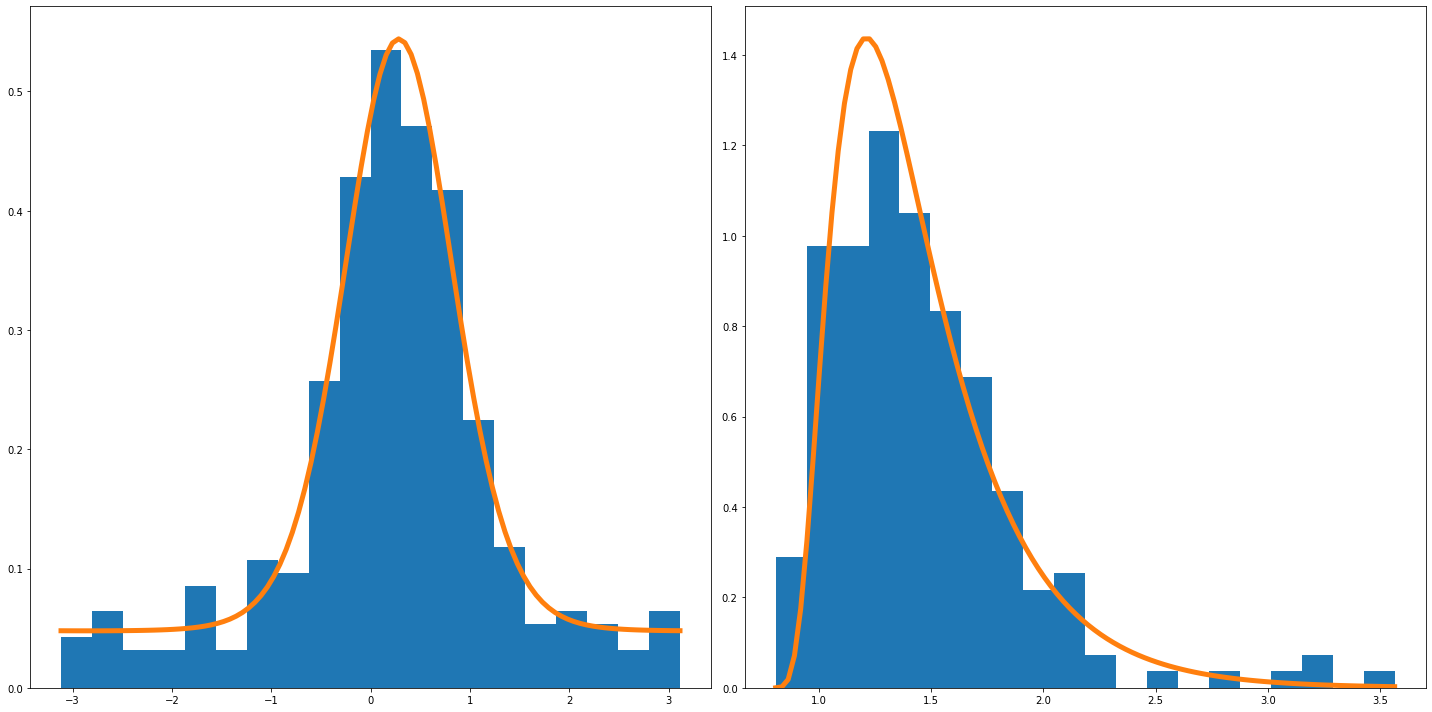

In [14]:
import matplotlib.pyplot as plt

figure, axis = plt.subplots(1, 2, figsize=(20,10), tight_layout=True)

theta = np.linspace(min(CA), max(CA), 100)
Pr_theta = np.empty(len(theta))
for i in range(len(theta)):
    Pr_theta[i] = np.exp(-mixed([p,mu,k], theta[i]))
    
t = np.linspace(min(CDM_RT), max(CDM_RT), 100)
Pr_t = np.empty(len(t))
for i in range(len(t)):
    Pr_t[i] = PrRT(v, theta_v, a, t0, t[i])
    
axis[0].hist(CA, bins=20, density=True)
axis[0].plot(theta, Pr_theta, linewidth=5)
axis[1].hist(CDM_RT, bins=20, density=True)
axis[1].plot(t, Pr_t, linewidth=5)
plt.show()